# Escuela Politécnica Nacional
**Nombre:** Mateo Coronado  

**Fecha:** 27/11/2024

**Materia:** Métodos Numéricos


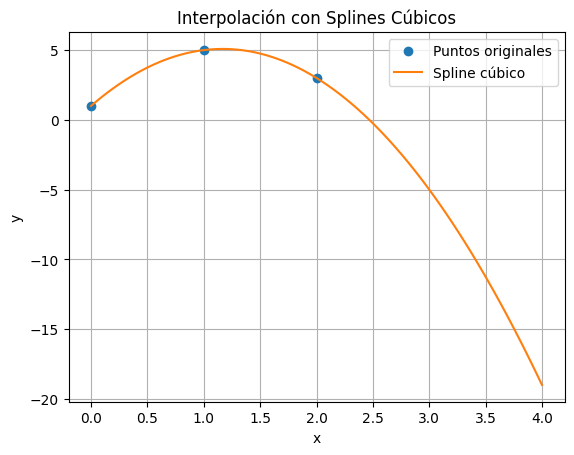

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Puntos conocidos
x = np.array([0, 1, 2])
y = np.array([1, 5, 3])

# Crear el spline cúbico
spline = CubicSpline(x, y)

# Valores interpolados
x_new = np.linspace(0, 4, 100)
y_new = spline(x_new)

# Graficar
plt.plot(x, y, 'o', label='Puntos originales')
plt.plot(x_new, y_new, label='Spline cúbico')
plt.legend()
plt.title("Interpolación con Splines Cúbicos")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


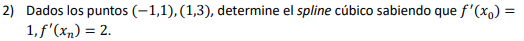

In [1]:
xs = [-1,0,1, 2]
ys = [3, 1, 5,3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

NameError: name 'cubic_spline' is not defined

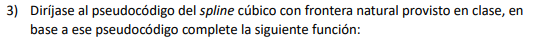

In [3]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:

    points = sorted(zip(xs, ys), key=lambda x: x[0])  

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  

    h = [xs[i + 1] - xs[i] for i in range(n)]  

    
    alpha = [0]  
    for i in range(1, n):
        alpha.append(3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1]))

    # Step 2: Set up the tridiagonal system
    l = [1]  # l[0] is always 1
    u = [0]  # u[0] is always 0
    z = [0]  # z[0] is always 0

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)  # l[n] is always 1
    z.append(0)  # z[n] is always 0

    # Step 3: Solve for the coefficients c
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []

    # Step 4: Calculate the spline coefficients (a, b, c, d) for each interval
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]  # The "a" coefficient is just the y value at the j-th point

        print(j, a, b, c[j], d)

        # Step 5: Create the cubic spline function for this interval
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)

    splines.reverse()  # Reverse the order to get splines in the correct order
    return splines


In [4]:
xs = [-1,0,1, 2]
ys = [3, 1, 5,3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

2 5 2.0 -6.0 2.0
1 1 2.0 6.0 -4.0
0 3 -4.0 0.0 2.0


-4.0*x + 2.0*(x + 1)**3 - 1.0

-4.0*x**3 + 6.0*x**2 + 2.0*x + 1

2.0*x + 2.0*(x - 1)**3 - 6.0*(x - 1)**2 + 3.0

______


2.0*x**3 + 6.0*x**2 + 2.0*x + 1.0

-4.0*x**3 + 6.0*x**2 + 2.0*x + 1

2.0*x**3 - 12.0*x**2 + 20.0*x - 5.0

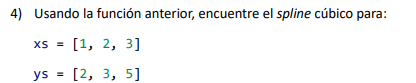

In [4]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

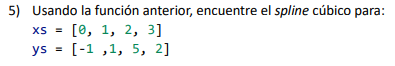

In [5]:
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

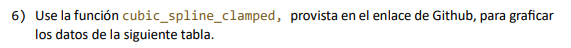

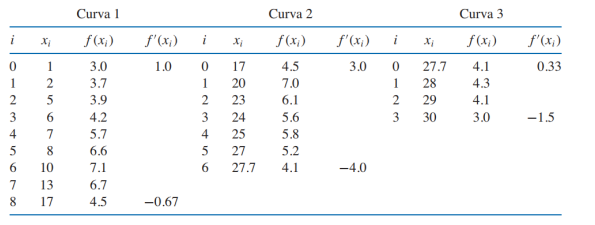

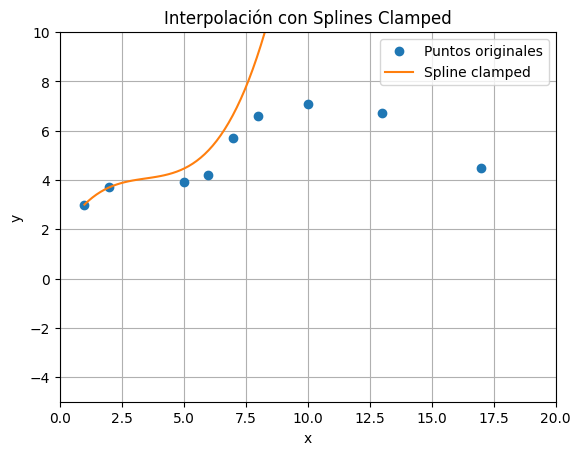

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def cubic_spline_clamed(xs: list[float], ys: list[float], fp0: float, fpn: float) -> list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1

    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [3 * (ys[1] - ys[0]) / h[0] - 3 * fp0]
    for i in range(1, n):
        alpha.append(3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1]))
    alpha.append(3 * fpn - 3 * (ys[n] - ys[n - 1]) / h[n - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])

    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [ys[i] for i in range(n)]

    c[n] = z[n]

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    x = sym.Symbol("x")
    splines = []

    for j in range(n):
        S = a[j] + b[j] * (x - xs[j]) + c[j] * (x - xs[j])**2 + d[j] * (x - xs[j])**3
        splines.append(S)

    return splines



# Calcular los splines
splines = cubic_spline_clamed(xs, ys, fp0, fpn)

# Graficar los splines
x_vals = np.linspace(min(xs), max(xs), 100)
y_vals = [splines[0].subs('x', x) for x in x_vals]

plt.ylim(-5, 10)
plt.xlim(0, 20)
plt.plot(xs, ys, 'o', label='Puntos originales')
plt.plot(x_vals, y_vals, label='Spline clamped')
plt.legend()
plt.title("Interpolación con Splines Clamped")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

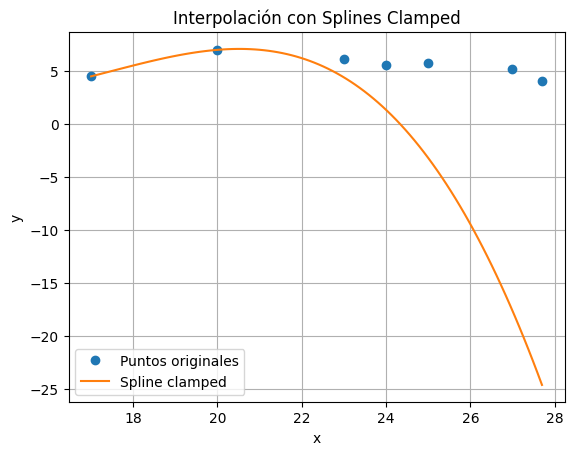

In [22]:
# Definir los puntos y las derivadas en los extremos
xs = [17, 20, 23, 24,25,27,27.7]
ys = [4.5,7.0,6.1,5.6,5.8,5.2,4.1]
fp0 = 1.0  # Derivada en el primer punto
fpn = -6.67  # Derivada en el último punto

splines = cubic_spline_clamed(xs, ys, fp0, fpn)
# Graficar los splines
x_vals = np.linspace(min(xs), max(xs), 100)
y_vals = [splines[0].subs('x', x) for x in x_vals]

plt.plot(xs, ys, 'o', label='Puntos originales')
plt.plot(x_vals, y_vals, label='Spline clamped')
plt.legend()
plt.title("Interpolación con Splines Clamped")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


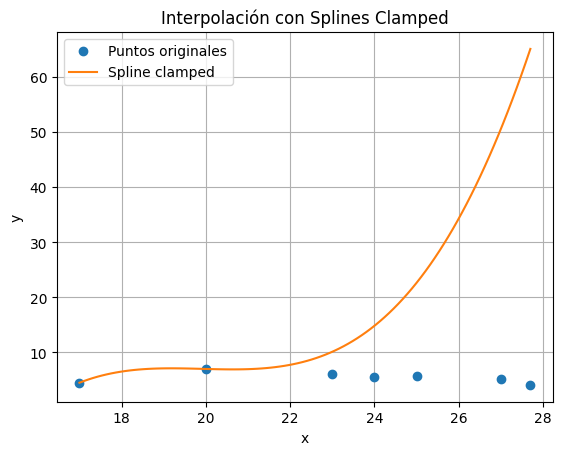

In [21]:
# Definir los puntos y las derivadas en los extremos
xs = [17, 20, 23, 24,25,27,27.7]
ys = [4.5,7.0,6.1,5.6,5.8,5.2,4.1]
fp0 = 3.0  # Derivada en el primer punto
fpn = -4.0  # Derivada en el último punto

splines = cubic_spline_clamed(xs, ys, fp0, fpn)
# Graficar los splines
x_vals = np.linspace(min(xs), max(xs), 100)
y_vals = [splines[0].subs('x', x) for x in x_vals]

plt.plot(xs, ys, 'o', label='Puntos originales')
plt.plot(x_vals, y_vals, label='Spline clamped')
plt.legend()
plt.title("Interpolación con Splines Clamped")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


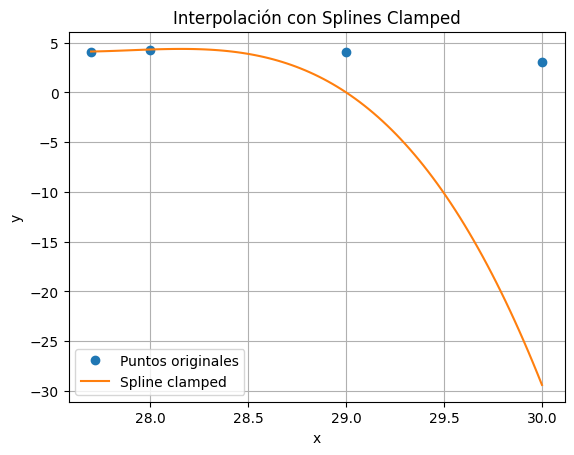

In [20]:
# Definir los puntos y las derivadas en los extremos
xs = [27.7,28,29,30]
ys = [4.1,4.3,4.1,3.0]
fp0 = 0.33  # Derivada en el primer punto
fpn = -1.5  # Derivada en el último punto

splines = cubic_spline_clamed(xs, ys, fp0, fpn)
# Graficar los splines
x_vals = np.linspace(min(xs), max(xs), 100)
y_vals = [splines[0].subs('x', x) for x in x_vals]

plt.plot(xs, ys, 'o', label='Puntos originales')
plt.plot(x_vals, y_vals, label='Spline clamped')
plt.legend()
plt.title("Interpolación con Splines Clamped")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
